## Importing the Libraries

In [36]:
import pandas as pd
import numpy as np
import fuzzywuzzy
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
dd = pd.read_excel(r"C:\Users\hi\Downloads\data (1).xlsx")

In [4]:
dd.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
dd.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


In [6]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [7]:
dd.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

## Duplicates

In [8]:
dd.duplicated().sum()

0

## Dropping Rows and columns

In [9]:
dd = dd.drop(['Unnamed: 0','ID','10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID','CollegeCityID', 'CollegeCityTier' ], axis = 1)

In [10]:
dd.drop(dd[dd['Designation']=='get'].index,inplace=True)

In [11]:
dd.drop(dd[dd['GraduationYear']== 0].index,inplace=True)

## Data Cleaning

In [12]:
dd['JobCity'] = dd['JobCity'].str.upper()
dd['JobCity'] = dd['JobCity'].str.strip()

In [13]:
choices = ['BANGALORE',"INDORE","CHENNAI",'GURGAON', 'HYDERABAD','NOIDA', 'KOLKATA', 'PUNE','MOHALI', 'JHANSI','NEW DELHI',
           'BHUBANESWAR', 'MUMBAI', 'MANGALORE', 'REWARI', 'GHAZIABAD','BHIWADI','MYSORE', 'RAJKOT', 'JAIPUR', 'THANE',
          'MAHARAJGANJ','THIRUVANANTHAPURAM','PANCHKULA','COIMBATORE', 'DHANBAD', 'LUCKNOW', 'GANDHI NAGAR',
       'DAMAN AND DIU', 'NAGPUR', 'BHAGALPUR','AHMEDABAD', 'KOCHI', 'BANKURA', 'KANPUR', 'VIJAYAWADA', 'BEAWAR', 'ALWAR',
       'SILIGURI', 'RAIPUR', 'BHOPAL', 'JODHPUR', 'UDAIPUR','MUZAFFARPUR', 'BULANDSHAHAR', 'HARIDWAR', 'RAIGARH','VISAKHAPATNAM',
        'JABALPUR', 'UNNAO', 'FARIDABAD', 'AURANGABAD','BELGAUM', 'DEHRADUN', 'RUDRAPUR', 'JAMSHEDPUR','DHARAMSHALA','HISSAR', 'RANCHI', 
'MADURAI','CHANDIGARH', 'AUSTRALIA', 'CHEYYAR', 'SONEPAT',
       'PANTNAGAR', 'JAGDALPUR', 'ANGUL', 'BARODA',
       'ARIYALUR', 'JOWAI',
       'NEEMRANA', 'TIRUPATI',
       'DUBAI', 'AHMEDNAGAR', 'NASHIK', 'BALLARI', 'LUDHIANA',
       'MUZAFFARNAGAR', 'GAGRET','GWALIOR',
       'SONIPAT', 'BAREILLY', 'HOSPET',
       'MIRYALAGUDA', 'DHARUHERA', 'MEERUT', 'GANJAM', 'HUBLI', 'NCR',
       'AGRA', 'TRICHY', 'KUDANKULAM ,TARAPUR', 'ONGOLE', 'SAMBALPUR',
       'PONDICHERRY', 'BUNDI', 'SADULPUR',
       'BIKANER', 'VADODARA', 'ASANSOL', 'TIRUNELVELI',
       'ERNAKULAM', 'BILASPUR', 'CHANDRAPUR', 'NANDED', 'DHARMAPURI',
       'VANDAVASI', 'ROHTAK', 'PATNA', 'SALEM',
       'BHARUCH', 'TORNAGALLU', 'JASPUR',
       'BURDWAN', 'SHIMLA','JAMMU', 'SHAHDOL',
       'MUVATTUPUZHA', 'AL JUBAIL', 'KALMAR',
       'SECUNDERABAD', 'RATNAGIRI', 'JHAJJAR',
       'GULBARGA', 'NALAGARH',
       'JEDDAH', 'JAMNAGAR',
       'GONDA', 'ORISSA',
       'JOSHIMATH', 'BATHINDA', 'JOHANNESBURG', 'KALA AMB', 'KARNAL',
       'LONDON', 'KOTA', 'BADDI', 'NAGARI',
       'METTUR', 'DURGAPUR', 'PONDI', 'SURAT', 'KURNOOL',
       'KOLHAPUR', 'BHILAI', 'BAHADURGARH',
       'RAYAGADA', 'KAKINADA', 'VARANASI', 'NELLORE',
       'HOWRAH', 'TRICHUR', 'AMBALA', 'KHOPOLI', 'ROORKEE',
       'ALLAHABAD', 'JALANDHAR', 'MANESAR', 'VAPI', 'PILANI',
       'RAS AL KHAIMAH', 'SINGARULI',
       'PHAGWARA', 'BARIPADA', 'YAMUNA NAGAR', 'SHAHIBABAD',
       'SAMPLA', 'GUWAHATI', 'ROURKELA', 'VELLORE', 'DAUSA',
       'LATUR', 'MAINPURI', 'DAMMAM', 'HALDIA',
       'RAE BARELI', 'PATIALA', 'GORAKHPUR', 'AMBALA CITY',
       'KARAD', 'RAJPURA']


In [14]:
def correct_spelling_errors(target_word="", choices=[], threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [15]:
dd['JobCity'] = dd['JobCity'].apply(lambda i : correct_spelling_errors(str(i), choices))

In [16]:
dd["JobCity"] = dd["JobCity"].replace("BENGALURU","BANGALORE", regex = False)

In [17]:
choices = [
       'electronics and communication engineering',
       'information technology', 'computer science and engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engineering',
       'computer science and technology', 'mechatronics',
       'automobile/automotive engineering', 'polymer technology',
       'mechanical & production engineering',
       'power systems and automation', 'instrumentation engineering',
       'telecommunication engineering',
       'industrial & management engineering', 'industrial engineering',
       'computer and communication engineering',
       'information & communication technology', 
       'internal combustion engine', 'computer networking',
       'biomedical engineering']

In [18]:
def correct_spelling_errors(target_word="", choices=[], threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [19]:
dd['Specialization'] = dd['Specialization'].apply(lambda i : correct_spelling_errors(str(i), choices))

In [20]:
dd['DOL'] = dd['DOL'].replace('present', "2015-12-31" )

In [21]:
dd['DOL'] = dd['DOL'].astype('datetime64[ns]')

In [22]:
dd["Total_Exp"] = dd['DOL'].dt.year - dd['DOJ'].dt.year

In [23]:
dd["Age"] = 2015 - dd['DOB'].dt.year

In [24]:
dd["Gender"] = dd["Gender"].replace('f', "F")
dd["Gender"] = dd["Gender"].replace('m', "M")

In [25]:
dd.drop(dd[dd['Total_Exp'] == 24].index, inplace = True)

In [26]:
dd.drop(['DOB','DOJ','DOL'], axis = 1, inplace = True )

In [27]:
dd.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Total_Exp', 'Age'],
      dtype='object')

## Typecasting

In [28]:
dd.dtypes

Salary                     int64
Designation               object
JobCity                   object
Gender                    object
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
MechanicalEngg             int64
ElectricalEngg             int64
TelecomEngg                int64
CivilEngg                  int64
conscientiousness        float64
agreeableness            float64
extraversion             float64
nueroticism              float64
openess_to_experience    float64
Total_Exp                  int32
Age                        int32
dtype: object

In [29]:
dd['Salary'] = dd['Salary'].astype('int32')
dd['CollegeTier'] = dd['CollegeTier'].astype('int8')
dd['collegeGPA'] = dd['collegeGPA'].astype('float16')
dd['Domain'] = dd['Domain'].astype('float16')
dd['ComputerProgramming'] = dd['ComputerProgramming'].astype('int16')
dd['ElectronicsAndSemicon'] = dd['ElectronicsAndSemicon'].astype('int16')
dd['ComputerScience'] = dd['ComputerScience'].astype('int16')
dd['MechanicalEngg'] = dd['MechanicalEngg'].astype('int16')
dd['ElectricalEngg'] = dd['ElectricalEngg'].astype('int16')
dd['TelecomEngg'] = dd['TelecomEngg'].astype('int16')
dd['CivilEngg'] = dd['CivilEngg'].astype('int16')
dd['Total_Exp'] = dd['Total_Exp'].astype('int8')
dd['Age'] = dd['Age'].astype('int8')
dd['conscientiousness'] = dd['conscientiousness'].astype('float16')
dd['agreeableness'] = dd['agreeableness'].astype('float16')
dd['extraversion'] = dd['extraversion'].astype('float16')
dd['nueroticism'] = dd['nueroticism'].astype('float16')
dd['openess_to_experience'] = dd['openess_to_experience'].astype('float16')

In [30]:
dd['GraduationYear'] = dd['GraduationYear'].astype('int16')
dd['English'] = dd['English'].astype('int16')
dd['Logical'] = dd['Logical'].astype('int16')
dd['Quant'] = dd['Quant'].astype('int16')

In [31]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3982 entries, 0 to 3997
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3982 non-null   int32  
 1   Designation            3982 non-null   object 
 2   JobCity                3982 non-null   object 
 3   Gender                 3982 non-null   object 
 4   CollegeTier            3982 non-null   int8   
 5   Degree                 3982 non-null   object 
 6   Specialization         3982 non-null   object 
 7   collegeGPA             3982 non-null   float16
 8   CollegeState           3982 non-null   object 
 9   GraduationYear         3982 non-null   int16  
 10  English                3982 non-null   int16  
 11  Logical                3982 non-null   int16  
 12  Quant                  3982 non-null   int16  
 13  Domain                 3982 non-null   float16
 14  ComputerProgramming    3982 non-null   int16  
 15  Electroni

## Univariate Analysis

In [32]:
object_col = dd.select_dtypes(include=['object'])

numerical_col = dd.select_dtypes(exclude=['object'])

In [33]:
object_col.columns

Index(['Designation', 'JobCity', 'Gender', 'Degree', 'Specialization',
       'CollegeState'],
      dtype='object')

## Univariate Analysis- Discrete Data

In [34]:
top_roles = dd['Designation'].value_counts().head(10)
bottom_roles = dd['Designation'].value_counts().tail(10)

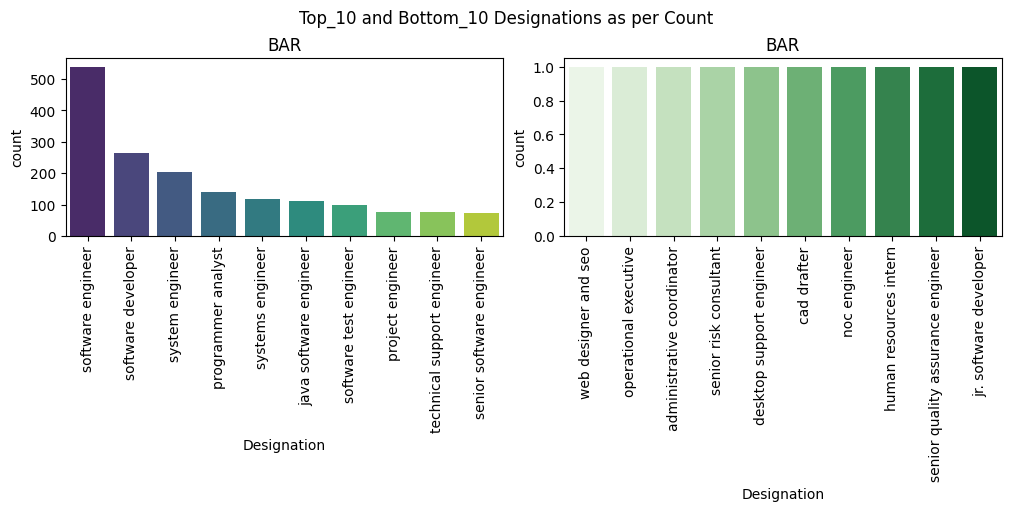

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
fig.suptitle("Top_10 and Bottom_10 Designations as per Count")

axs[0].set_title("BAR")
sns.countplot(data=dd, x='Designation', order=top_roles.index , palette='viridis', ax=axs[0])
axs[0].tick_params(axis='x', rotation=90)

axs[1].set_title("BAR")
sns.countplot(data=dd, x='Designation', order=bottom_roles.index ,palette='Greens', ax=axs[1])
axs[1].tick_params(axis='x', rotation=90)

plt.show()

#### Out of 418 unique Designations top_3 designations combine holds 1/4th share leaving rest 3/4th share to 415 unique designations.

In [38]:
top_city = dd['JobCity'].value_counts().head(10)
bottom_city = dd['JobCity'].value_counts().tail(10)

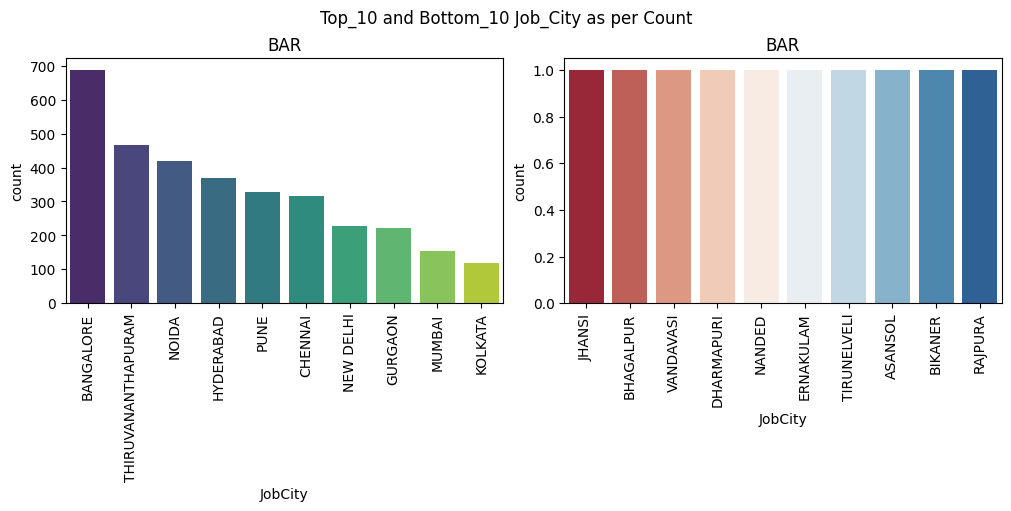

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
fig.suptitle("Top_10 and Bottom_10 Job_City as per Count")

axs[0].set_title("BAR")
sns.countplot(data=dd, x='JobCity', order=top_city.index , palette='viridis', ax=axs[0])
axs[0].tick_params(axis='x', rotation=90)

axs[1].set_title("BAR")
sns.countplot(data=dd, x='JobCity', order=bottom_city.index ,palette='RdBu', ax=axs[1])
axs[1].tick_params(axis='x', rotation=90)

plt.show()


#### Although Tier_1 cities have upper hand among top 10 Job_Cities, 3 Tier_2 cities combine corresponds to 34% among top_10

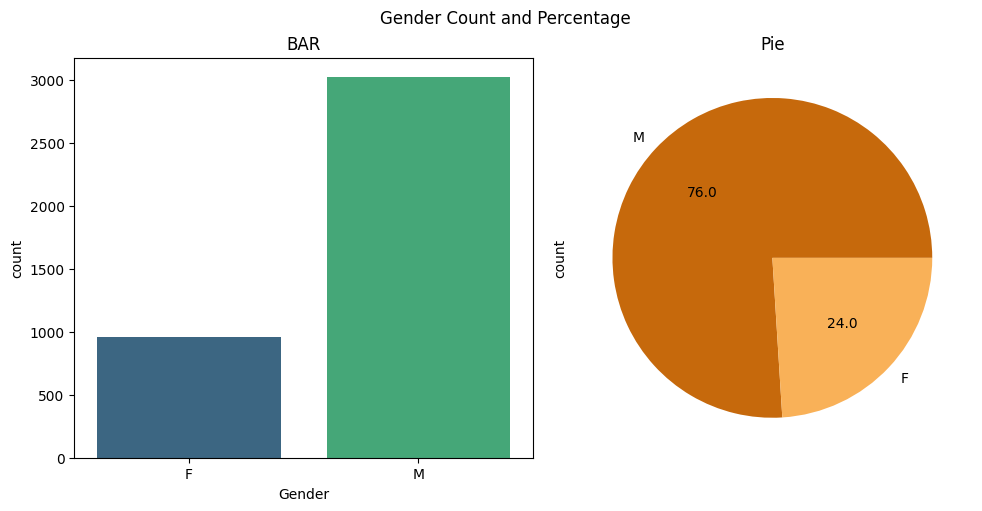

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
fig.suptitle("Gender Count and Percentage")

axs[0].set_title("BAR")
sns.countplot(data=dd, x='Gender',palette='viridis', ax=axs[0])

axs[1].set_title("Pie")
colors = sns.color_palette('PuOr')
dd['Gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f', colors = colors,ax=axs[1])


plt.show()

#### Male candidates are seen to be 3 times that of Female candidates

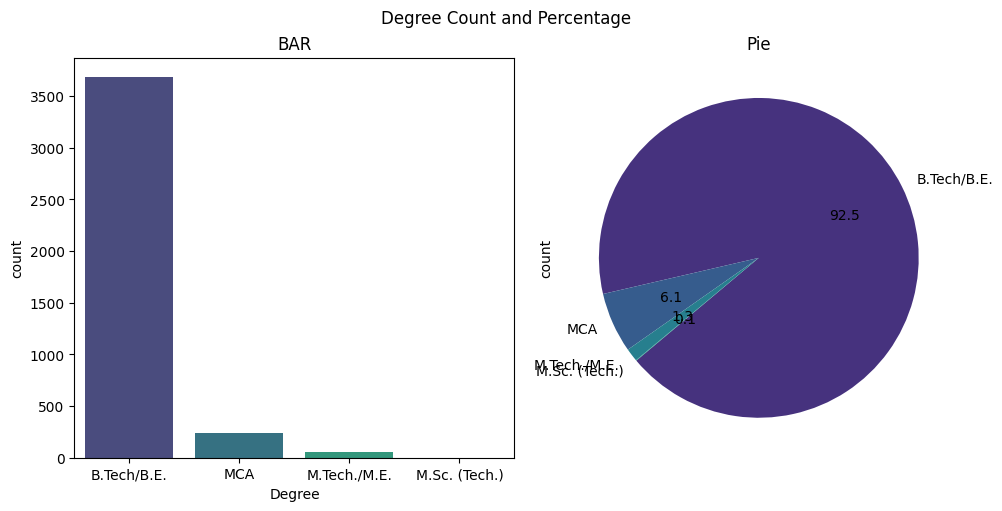

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
fig.suptitle("Degree Count and Percentage")

axs[0].set_title("BAR")
sns.countplot(data=dd, x='Degree',palette='viridis', ax=axs[0] , )

axs[1].set_title("Pie")
colors = sns.color_palette('viridis')
dd['Degree'].value_counts().plot(kind = 'pie', autopct = '%1.1f', colors = colors,ax=axs[1] , startangle=220)

plt.show()

#### B.Tech/B.E. beats other degrees with masive count of above 90%, leaving back all other degrees combine, with less than 10%

In [42]:
top_sp = dd['Specialization'].value_counts().head(10)
bottom_sp = dd['Specialization'].value_counts().tail(10)

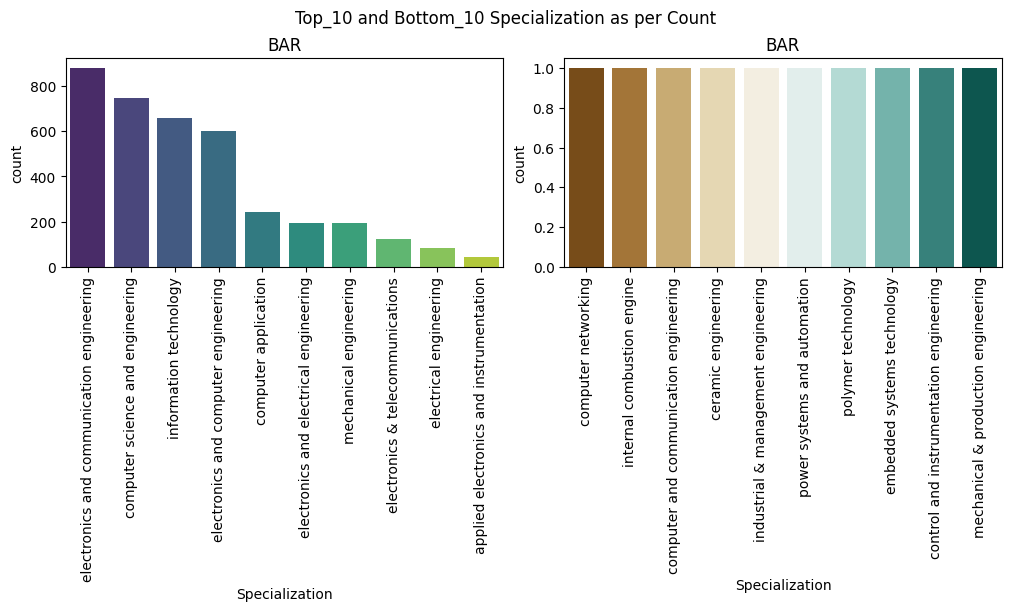

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)
fig.suptitle("Top_10 and Bottom_10 Specialization as per Count")

axs[0].set_title("BAR")
sns.countplot(data=dd, x='Specialization', order=top_sp.index , palette='viridis', ax=axs[0])
axs[0].tick_params(axis='x', rotation=90)

axs[1].set_title("BAR")
sns.countplot(data=dd, x='Specialization', order=bottom_sp.index ,palette='BrBG', ax=axs[1])
axs[1].tick_params(axis='x', rotation=90)

plt.show()

#### From above Designations, "software engineer" has been on top, yet huge number of candidates are from electronics engineering or combination of electronics engineering background. Which seems like a huge number of candidates have changed their domain

In [44]:
top_clg = dd['CollegeState'].value_counts().head(14)
bottom_clg = dd['CollegeState'].value_counts().tail(12)

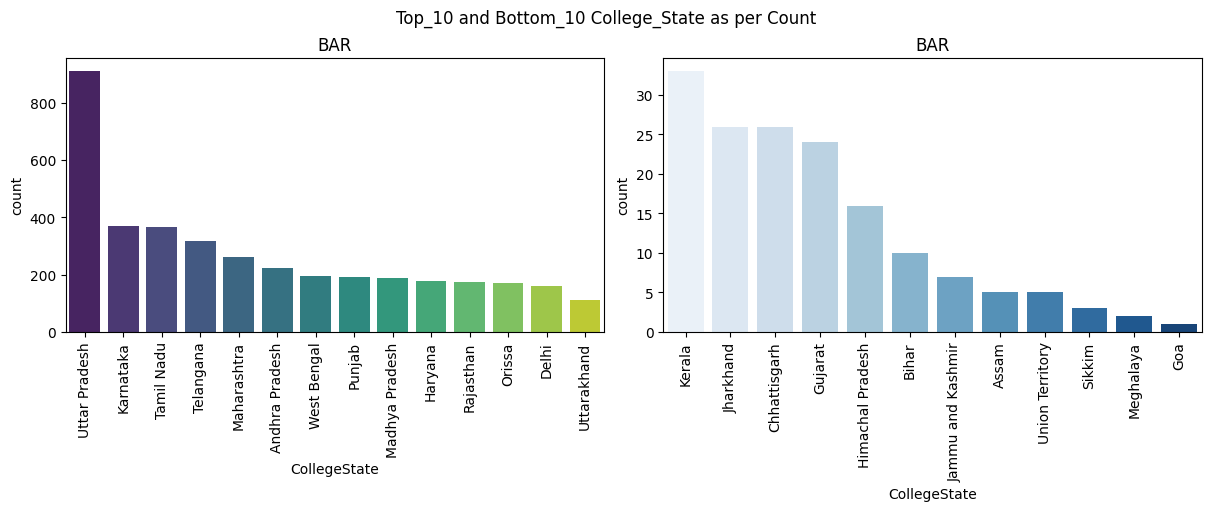

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
fig.suptitle("Top_10 and Bottom_10 College_State as per Count")

axs[0].set_title("BAR")
sns.countplot(data=dd, x='CollegeState', order=top_clg.index , palette='viridis', ax=axs[0])
axs[0].tick_params(axis='x', rotation=90)

axs[1].set_title("BAR")
sns.countplot(data=dd, x='CollegeState', order=bottom_clg.index ,palette='Blues', ax=axs[1])
axs[1].tick_params(axis='x', rotation=90)

plt.show()


#### Approximately 50% of candidates have done their graduation from 4 states, with 1/4th of total candidates from Uttarpradesh.

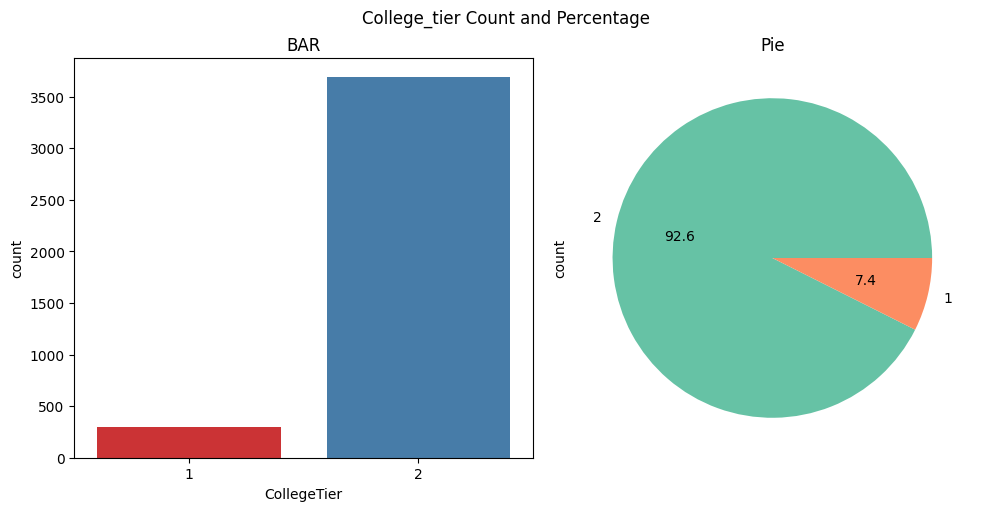

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
fig.suptitle("College_tier Count and Percentage")

axs[0].set_title("BAR")
sns.countplot(data=dd, x='CollegeTier',palette='Set1', ax=axs[0])

axs[1].set_title("Pie")
colors = sns.color_palette('Set2')
dd['CollegeTier'].value_counts().plot(kind = 'pie', autopct = '%1.1f', colors = colors,ax=axs[1])


plt.show()

#### Candidates from tier_2 colleges are more interested in AMCAT, Candidates from Tier_2 are 13 times more in number than Tier_1.

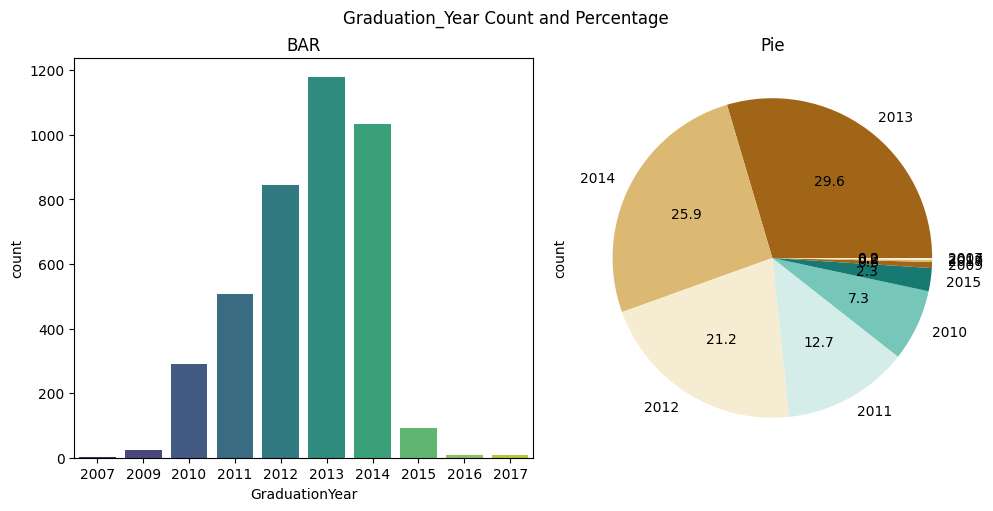

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
fig.suptitle("Graduation_Year Count and Percentage")

axs[0].set_title("BAR")
sns.countplot(data=dd, x='GraduationYear',palette='viridis', ax=axs[0])

axs[1].set_title("Pie")
colors = sns.color_palette('BrBG')
dd['GraduationYear'].value_counts().plot(kind = 'pie', autopct = '%1.1f', colors = colors,ax=axs[1])


plt.show()

#### As the data is from 2015, most of the candidates are recent graduates, candidates who completed graduation in years 2012,2013 and 2014 combine are 3 times that of candidates who completed graduation in other years. 2016 and 2017 are candidates who are yet to complete their graduation.

## Univariate Analysis- Numerical Data

In [48]:
sns.set(style="darkgrid", palette="RdBu")

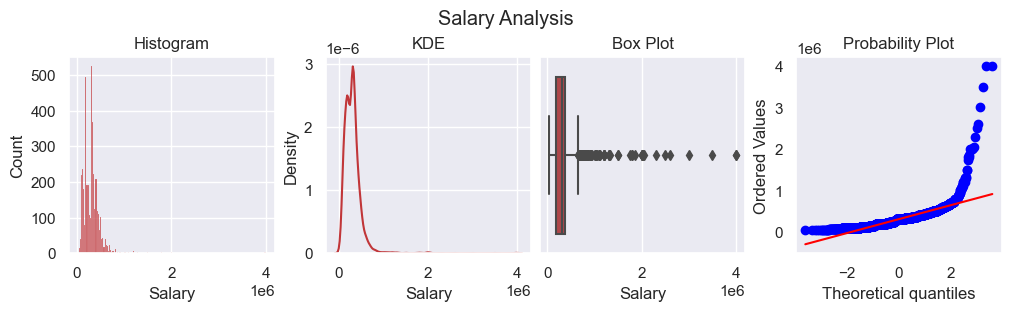

In [49]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Salary Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=dd, x='Salary', ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=dd, x='Salary', ax=axs[1])

axs[2].set_title("Box Plot")
sns.boxplot(data=dd, x='Salary', ax=axs[2])

stats.probplot(dd['Salary'], dist=stats.norm, plot=axs[3])
axs[3].grid()

plt.show()

#### As salary is True data outliers are retained. Salary is not normally distributed, it is right skewed, which tell that there are candidates earning high income per annum.

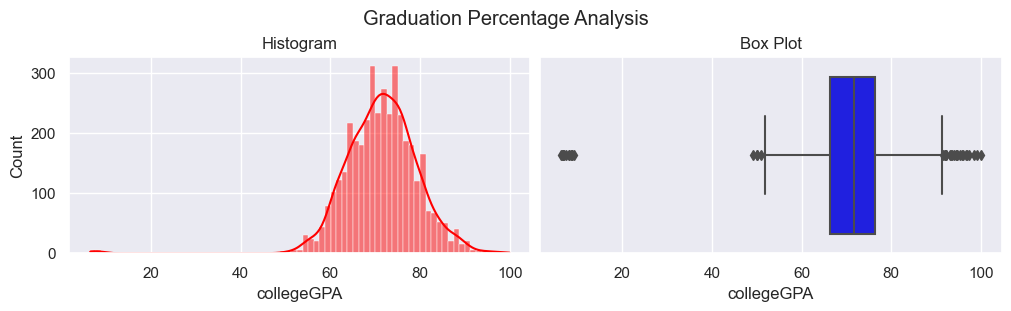

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Graduation Percentage Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='collegeGPA', kde = True, ax=axs[0], color = "red")

axs[1].set_title("Box Plot")
sns.boxplot(data=df, x='collegeGPA', ax=axs[1], color = 'blue')

plt.show()

#### Candidates are high in number who secured percentage between 65-80, yet few candidates are found who extremely good percentage. Few are also found with extremely low percentage, but still they gained jobs.

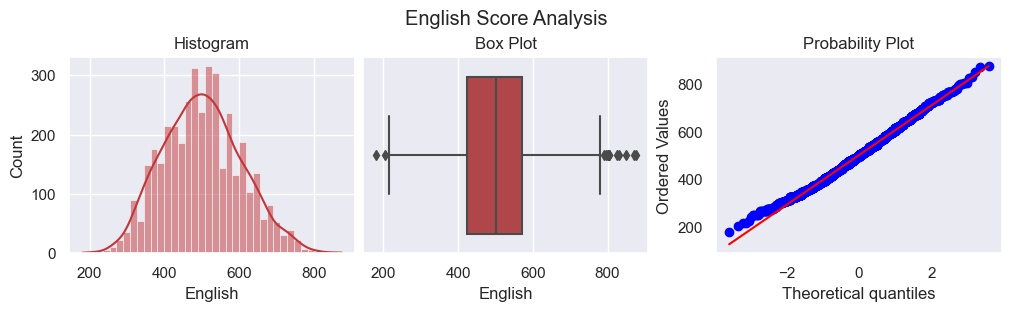

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("English Score Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=dd, x='English', kde = True, ax=axs[0])

axs[1].set_title("Box Plot")
sns.boxplot(data=dd, x='English', ax=axs[1])

stats.probplot(dd['English'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

#### Although there are few ouliers, English scores are normally distribuited with maximum candidates lying inside the whisker

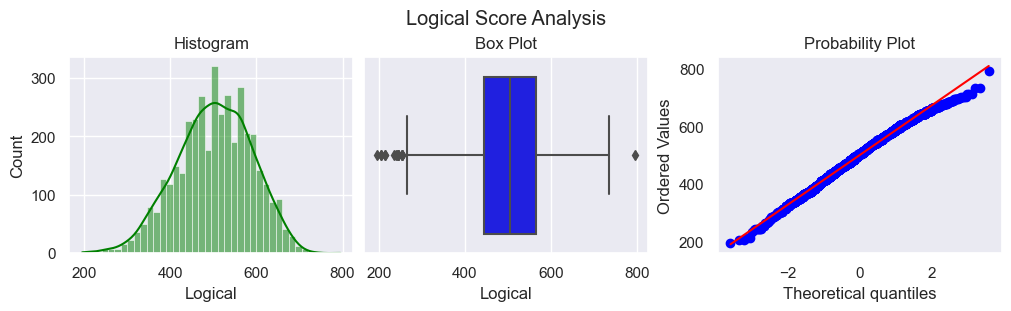

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Logical Score Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=dd, x='Logical', kde = True, ax=axs[0], color = 'green')

axs[1].set_title("Box Plot")
sns.boxplot(data=dd, x='Logical', ax=axs[1], color = 'blue')

stats.probplot(dd['Logical'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

#### Most of the candidates have scored marks between 250 and 700 making this a normal distributed data.

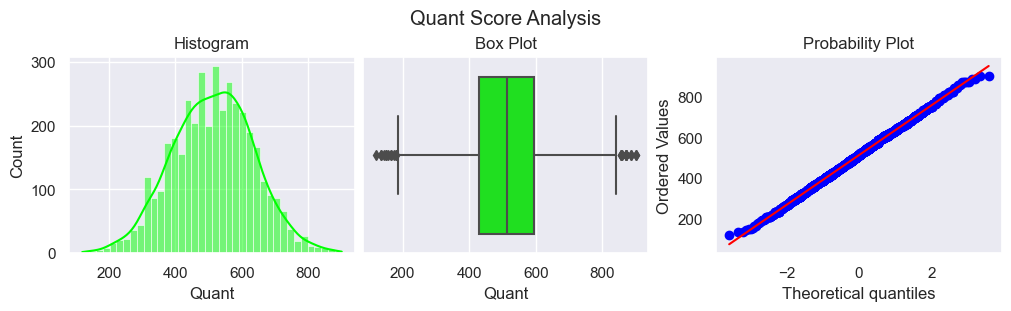

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Quant Score Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=dd, x='Quant', kde = True, ax=axs[0], color = 'lime')

axs[1].set_title("Box Plot")
sns.boxplot(data=dd, x='Quant', ax=axs[1], color = 'lime')

stats.probplot(dd['Quant'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()


#### A perfect normal distribution.

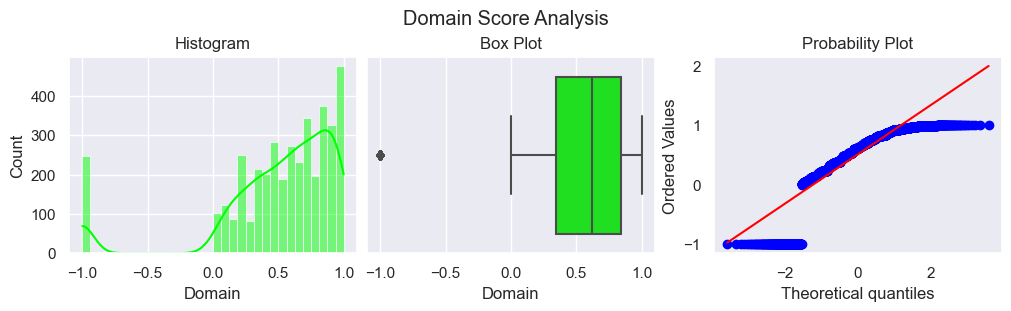

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Domain Score Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='Domain', kde = True, ax=axs[0], color = 'lime')

axs[1].set_title("Box Plot")
sns.boxplot(data=df, x='Domain', ax=axs[1], color = 'lime')

stats.probplot(df['Domain'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

#### The data is spread widely and is not normally distrbuted.

In [66]:
cp = dd[dd['ComputerProgramming'] != -1]

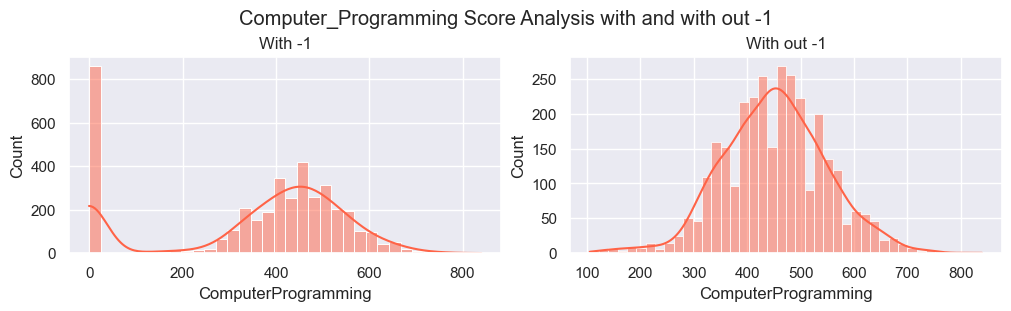

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Computer_Programming Score Analysis with and with out -1")

axs[0].set_title("With -1")
sns.histplot(data=dd, x='ComputerProgramming', kde = True, ax=axs[0], color = 'tomato')

axs[1].set_title("With out -1")
sns.histplot(data=cp, x='ComputerProgramming', kde = True, ax=axs[1], color = 'tomato')

plt.show()

#### Computer programming is one of optional subjects, -1 represents candidates have not choosen Computer Programming, hence data without -1 has to be considered and this data is mostly normally distributed.

In [68]:
es = dd[dd['ElectronicsAndSemicon'] != -1]

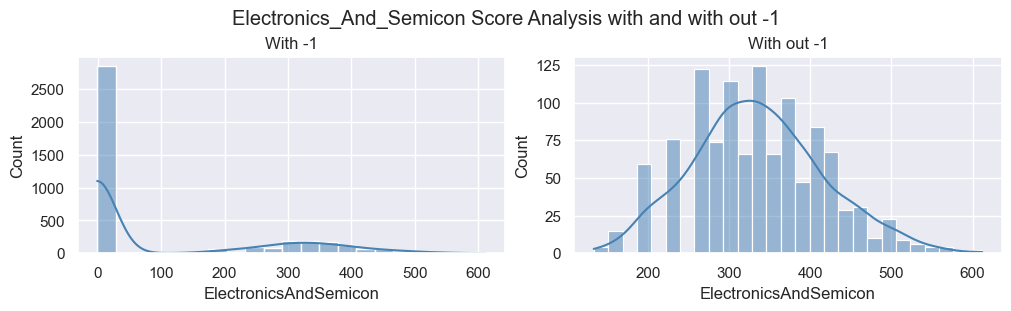

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Electronics_And_Semicon Score Analysis with and with out -1")

axs[0].set_title("With -1")
sns.histplot(data=dd, x='ElectronicsAndSemicon', kde = True, ax=axs[0], color = 'steelblue')

axs[1].set_title("With out -1")
sns.histplot(data=es, x='ElectronicsAndSemicon', kde = True, ax=axs[1], color = 'steelblue')

plt.show()

In [70]:
cs = dd[dd['ComputerScience'] != -1]

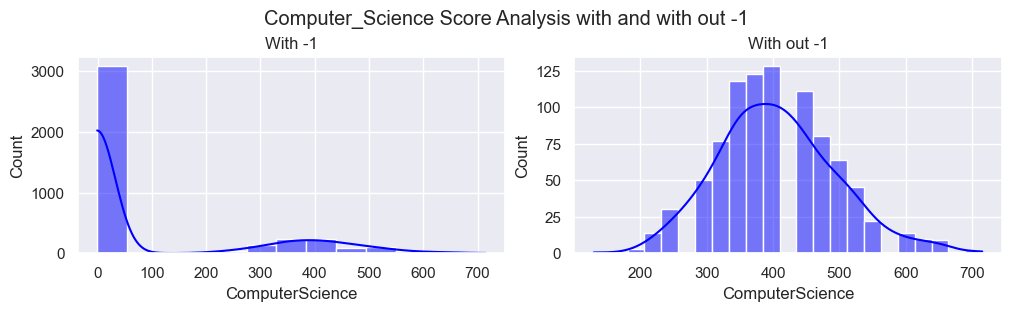

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Computer_Science Score Analysis with and with out -1")

axs[0].set_title("With -1")
sns.histplot(data=dd, x='ComputerScience', kde = True, ax=axs[0], color = 'blue')

axs[1].set_title("With out -1")
sns.histplot(data=cs, x='ComputerScience', kde = True, ax=axs[1], color = 'blue')

plt.show()

In [72]:
en = dd[dd['MechanicalEngg'] != -1]

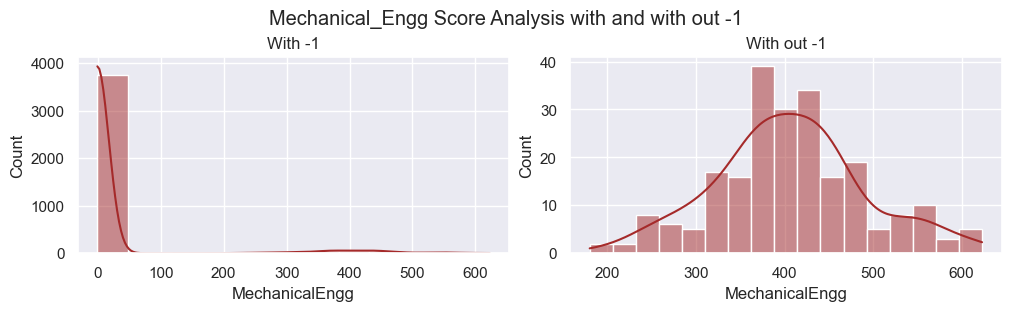

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Mechanical_Engg Score Analysis with and with out -1")

axs[0].set_title("With -1")
sns.histplot(data=dd, x='MechanicalEngg', kde = True, ax=axs[0], color = 'brown')

axs[1].set_title("With out -1")
sns.histplot(data=en, x='MechanicalEngg', kde = True, ax=axs[1], color = 'brown')

plt.show()

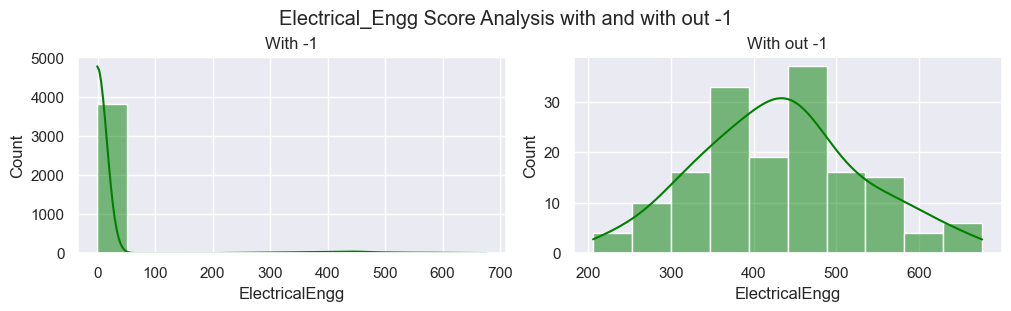

In [74]:
ee = dd[dd['ElectricalEngg'] != -1]

fig, axs = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Electrical_Engg Score Analysis with and with out -1")

axs[0].set_title("With -1")
sns.histplot(data=dd, x='ElectricalEngg', kde = True, ax=axs[0], color = 'green')

axs[1].set_title("With out -1")
sns.histplot(data=ee, x='ElectricalEngg', kde = True, ax=axs[1], color = 'green')

plt.show()

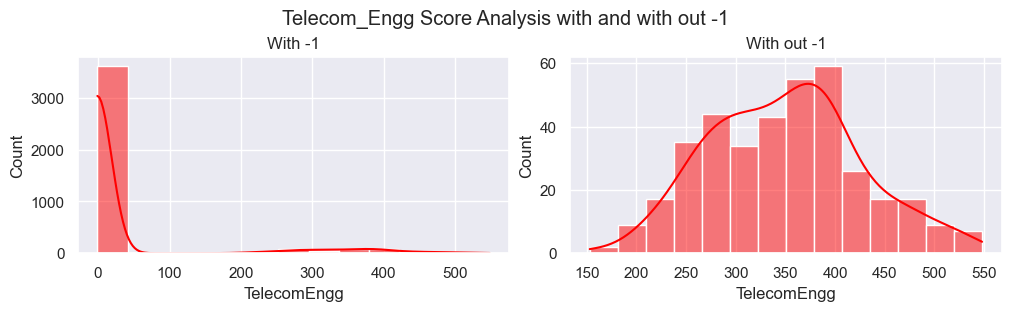

In [75]:
te = dd[dd['TelecomEngg'] != -1]

fig, axs = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Telecom_Engg Score Analysis with and with out -1")

axs[0].set_title("With -1")
sns.histplot(data=dd, x='TelecomEngg', kde = True, ax=axs[0], color = 'red')

axs[1].set_title("With out -1")
sns.histplot(data=te, x='TelecomEngg', kde = True, ax=axs[1], color = 'red')

plt.show()


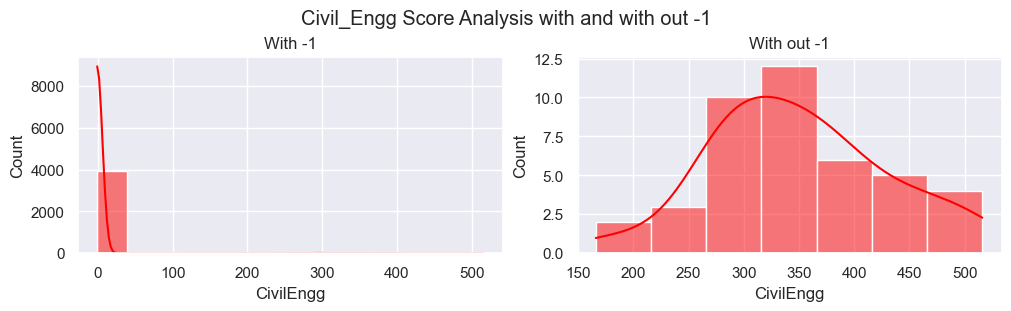

In [76]:
ce = dd[dd['CivilEngg'] != -1]

fig, axs = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Civil_Engg Score Analysis with and with out -1")

axs[0].set_title("With -1")
sns.histplot(data=dd, x='CivilEngg', kde = True, ax=axs[0], color = '#FF0000')

axs[1].set_title("With out -1")
sns.histplot(data=ce, x='CivilEngg', kde = True, ax=axs[1], color = '#FF0000')

plt.show()

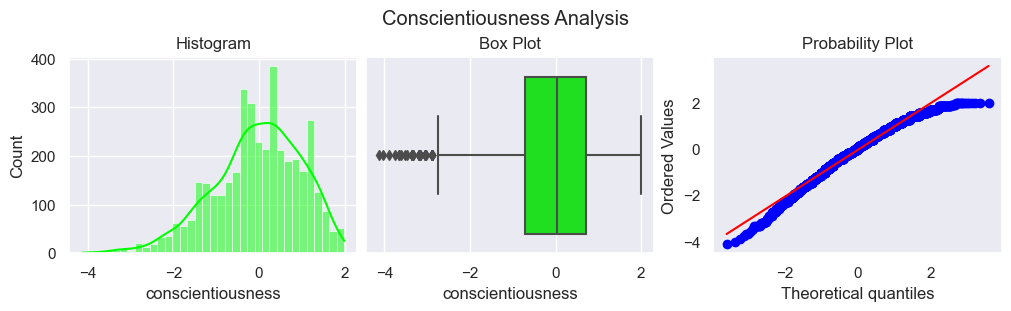

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Conscientiousness Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='conscientiousness', kde = True, ax=axs[0], color = 'lime')

axs[1].set_title("Box Plot")
sns.boxplot(data=df, x='conscientiousness', ax=axs[1], color = 'lime')

stats.probplot(df['conscientiousness'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

#### These are the personality identification scores

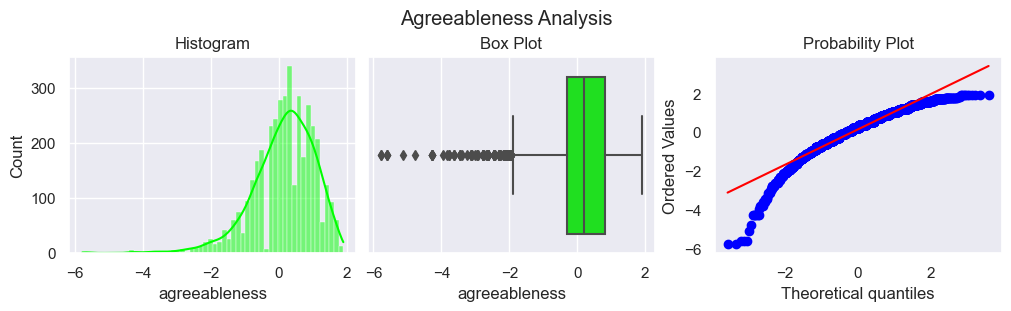

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Agreeableness Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='agreeableness', kde = True, ax=axs[0], color = '#00FF00')

axs[1].set_title("Box Plot")
sns.boxplot(data=df, x='agreeableness', ax=axs[1], color = '#00FF00')

stats.probplot(df['agreeableness'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

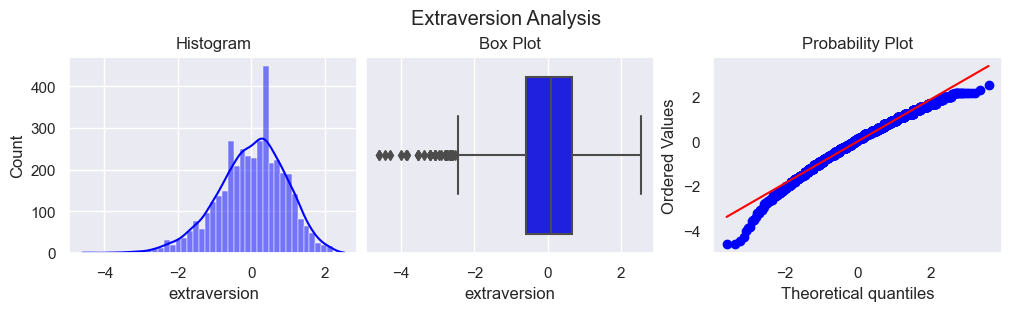

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Extraversion Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='extraversion', kde = True, ax=axs[0], color = '#0000FF')

axs[1].set_title("Box Plot")
sns.boxplot(data=df, x='extraversion', ax=axs[1], color = '#0000FF')

stats.probplot(df['extraversion'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

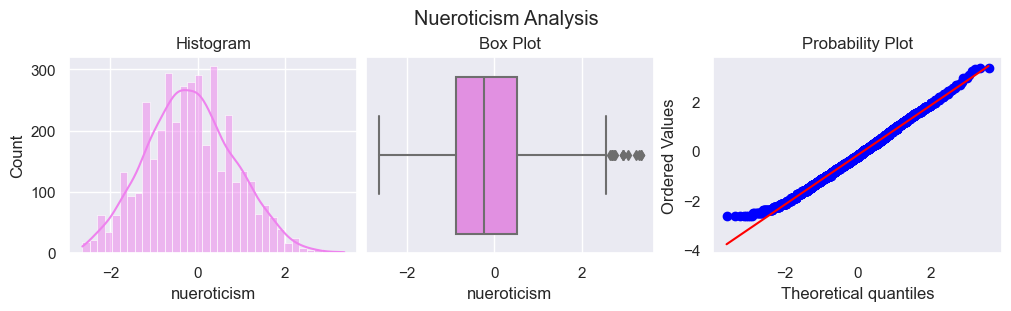

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Nueroticism Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='nueroticism', kde = True, ax=axs[0], color = 'violet')

axs[1].set_title("Box Plot")
sns.boxplot(data=df, x='nueroticism', ax=axs[1], color = 'violet')

stats.probplot(df['nueroticism'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

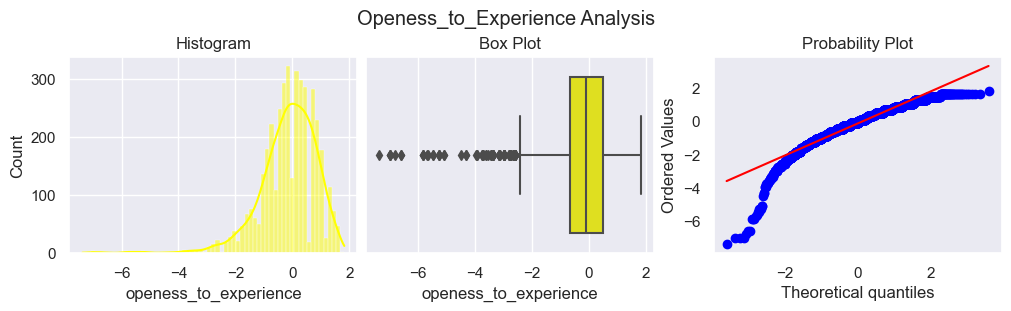

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Openess_to_Experience Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='openess_to_experience', kde = True, ax=axs[0], color = 'yellow')

axs[1].set_title("Box Plot")
sns.boxplot(data=df, x='openess_to_experience', ax=axs[1], color = 'yellow')

stats.probplot(df['openess_to_experience'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

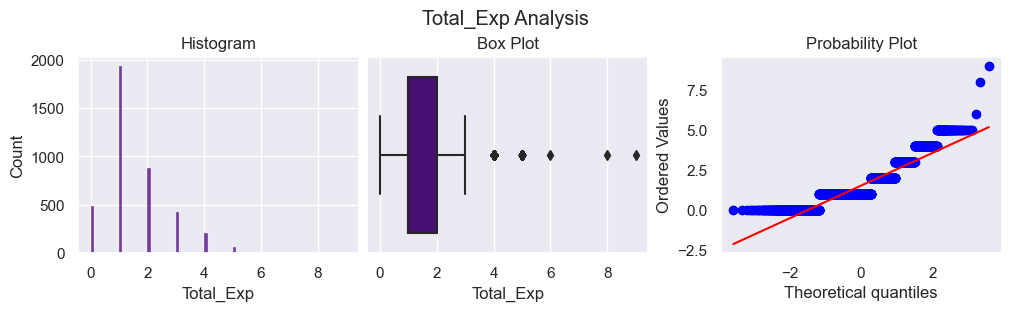

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Total_Exp Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=dd, x='Total_Exp', ax=axs[0], color = 'indigo')

axs[1].set_title("Box Plot")
sns.boxplot(data=dd, x='Total_Exp', ax=axs[1], color = 'indigo')

stats.probplot(dd['Total_Exp'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

#### Most of the candidates are just 0-3 years experienced as most of them are recent graduates, this can be justified by Graduation year

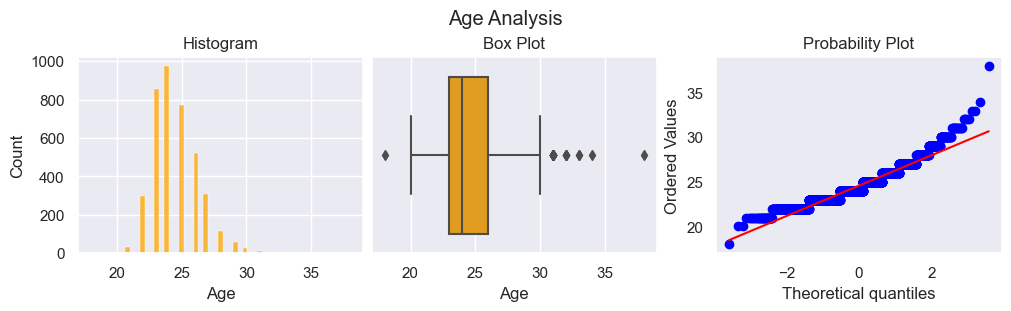

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Age Analysis")

axs[0].set_title("Histogram")
sns.histplot(data=dd, x='Age', ax=axs[0], color = 'orange')

axs[1].set_title("Box Plot")
sns.boxplot(data=dd, x='Age', ax=axs[1], color = 'orange')

stats.probplot(dd['Age'], dist=stats.norm, plot=axs[2])
axs[2].grid()

plt.show()

#### Young age group has captured major share among the candidates

## Bi-Variate Analysis
### Numerical v/s Numerical
#### Salary as Target variable

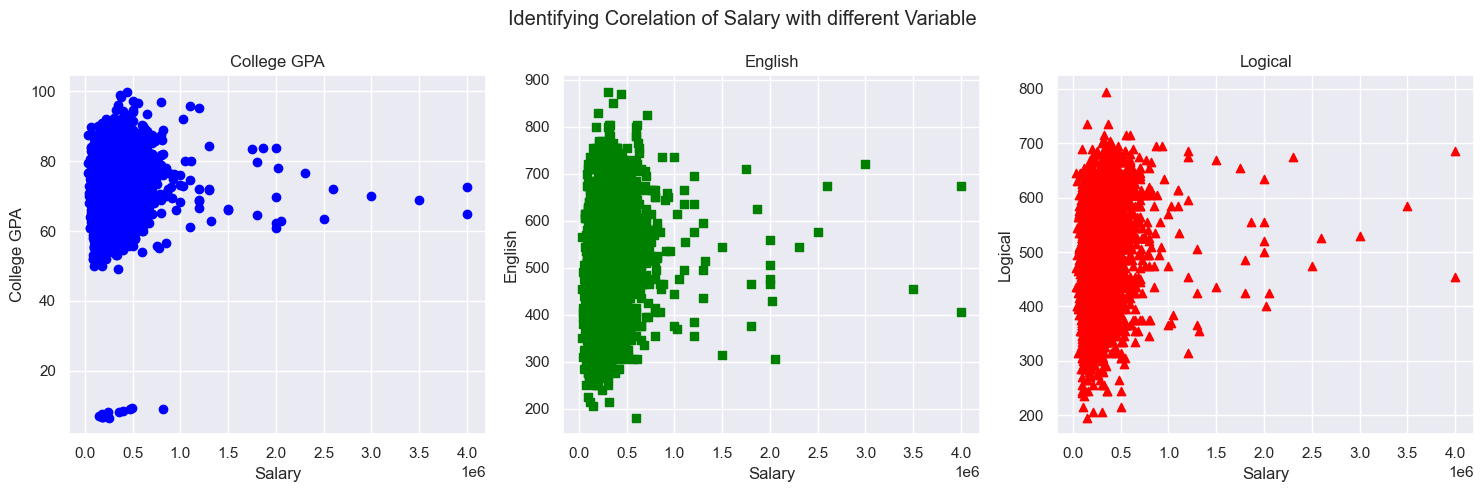

In [87]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Identifying Corelation of Salary with different Variable")

axs[0].scatter(dd['Salary'], dd['collegeGPA'], color='blue', marker='o')
axs[0].set_title('College GPA')
axs[0].set_xlabel('Salary')
axs[0].set_ylabel('College GPA')

axs[1].scatter(dd['Salary'], dd['English'], color='green', marker='s')
axs[1].set_title('English')
axs[1].set_xlabel('Salary')
axs[1].set_ylabel('English')

axs[2].scatter(dd['Salary'], dd['Logical'], color='red', marker='^')
axs[2].set_title('Logical')
axs[2].set_xlabel('Salary')
axs[2].set_ylabel('Logical')

plt.tight_layout()

plt.show()

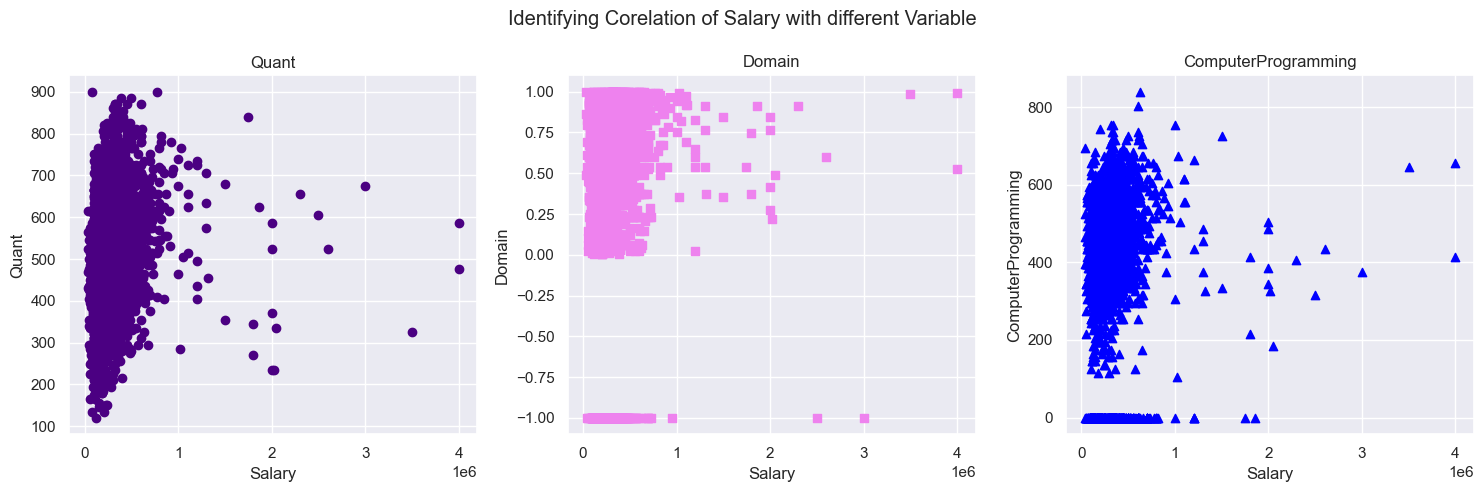

In [88]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Identifying Corelation of Salary with different Variable")

axs[0].scatter(dd['Salary'], dd['Quant'], color='indigo', marker='o')
axs[0].set_title('Quant')
axs[0].set_xlabel('Salary')
axs[0].set_ylabel('Quant')

axs[1].scatter(dd['Salary'], dd['Domain'], color='violet', marker='s')
axs[1].set_title('Domain')
axs[1].set_xlabel('Salary')
axs[1].set_ylabel('Domain')

axs[2].scatter(dd['Salary'], dd['ComputerProgramming'], color='blue', marker='^')
axs[2].set_title('ComputerProgramming')
axs[2].set_xlabel('Salary')
axs[2].set_ylabel('ComputerProgramming')

plt.tight_layout()

plt.show()


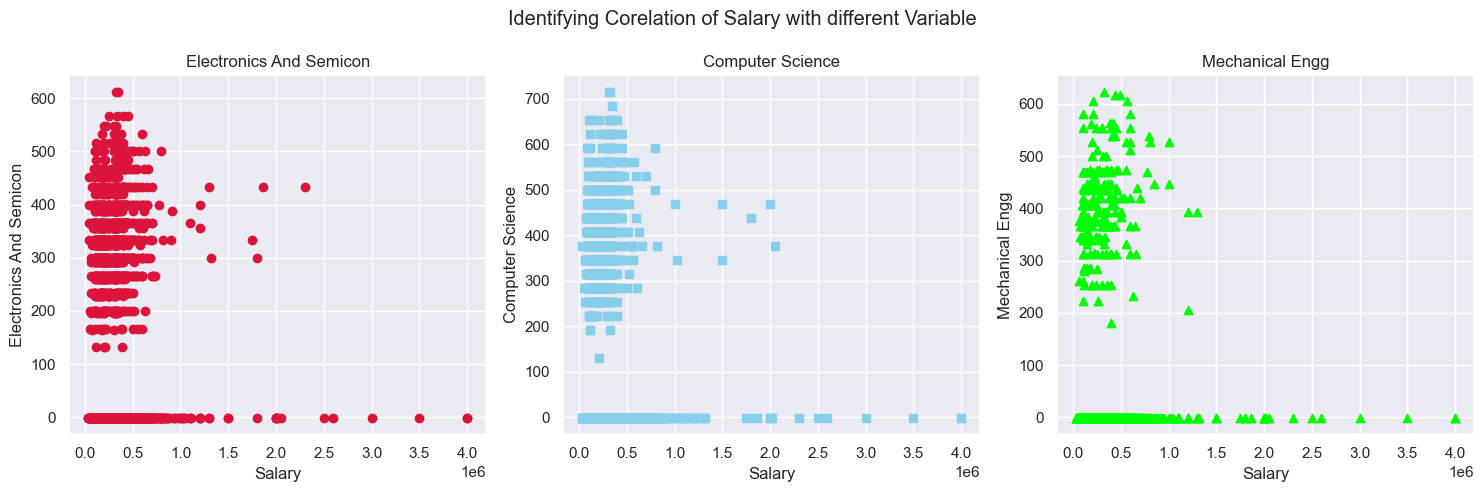

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Identifying Corelation of Salary with different Variable")

axs[0].scatter(dd['Salary'], dd['ElectronicsAndSemicon'], color='crimson', marker='o')
axs[0].set_title('Electronics And Semicon')
axs[0].set_xlabel('Salary')
axs[0].set_ylabel('Electronics And Semicon')

axs[1].scatter(dd['Salary'], dd['ComputerScience'], color='skyblue', marker='s')
axs[1].set_title('Computer Science')
axs[1].set_xlabel('Salary')
axs[1].set_ylabel('Computer Science')

axs[2].scatter(dd['Salary'], dd['MechanicalEngg'], color='lime', marker='^')
axs[2].set_title('Mechanical Engg')
axs[2].set_xlabel('Salary')
axs[2].set_ylabel('Mechanical Engg')

plt.tight_layout()

plt.show()

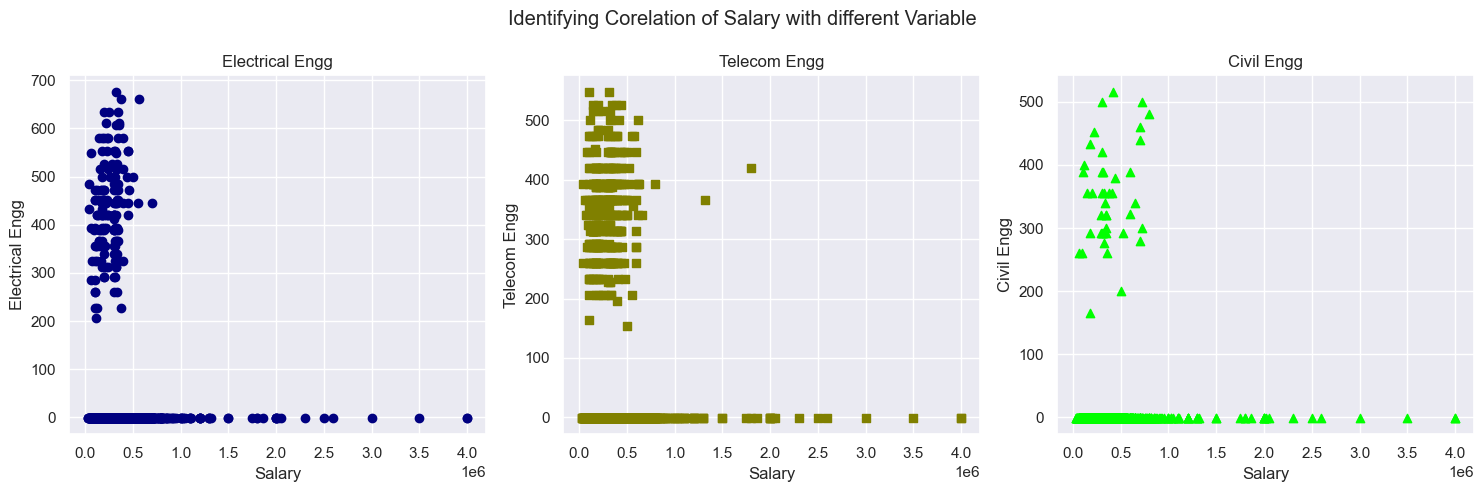

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Identifying Corelation of Salary with different Variable")

axs[0].scatter(dd['Salary'], dd['ElectricalEngg'], color='navy', marker='o')
axs[0].set_title('Electrical Engg')
axs[0].set_xlabel('Salary')
axs[0].set_ylabel('Electrical Engg')

axs[1].scatter(dd['Salary'], dd['TelecomEngg'], color='olive', marker='s')
axs[1].set_title('Telecom Engg')
axs[1].set_xlabel('Salary')
axs[1].set_ylabel('Telecom Engg')

axs[2].scatter(dd['Salary'], dd['CivilEngg'], color='lime', marker='^')
axs[2].set_title('Civil Engg')
axs[2].set_xlabel('Salary')
axs[2].set_ylabel('Civil Engg')

plt.tight_layout()

plt.show()


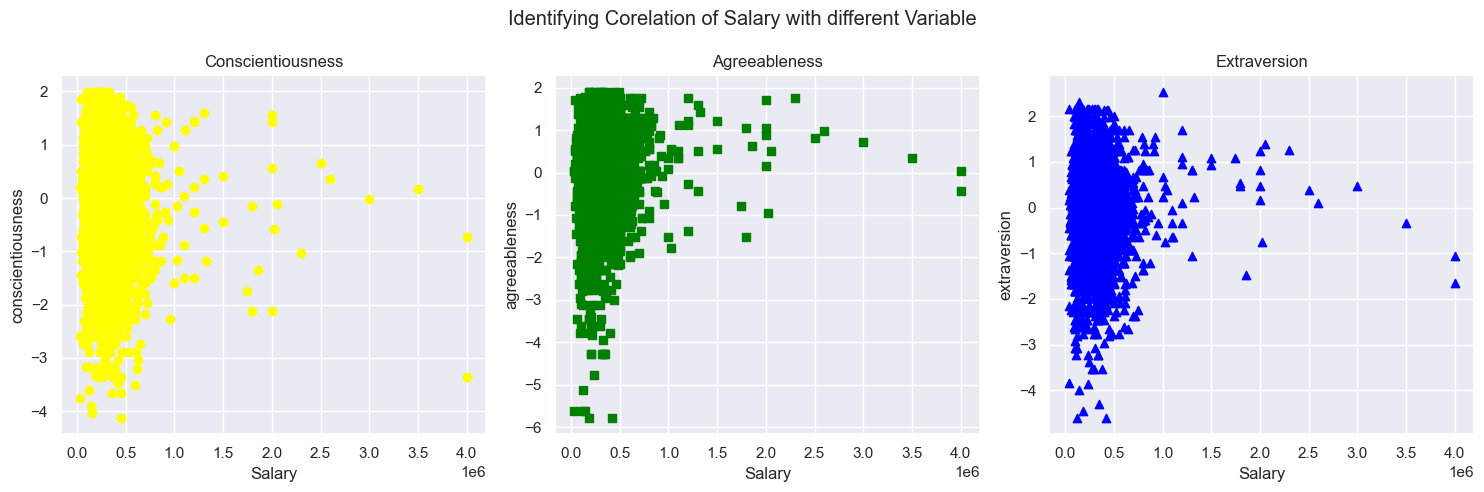

In [91]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Identifying Corelation of Salary with different Variable")

axs[0].scatter(dd['Salary'], dd['conscientiousness'], color='yellow', marker='o')
axs[0].set_title('Conscientiousness')
axs[0].set_xlabel('Salary')
axs[0].set_ylabel('conscientiousness')

axs[1].scatter(dd['Salary'], dd['agreeableness'], color='green', marker='s')
axs[1].set_title('Agreeableness')
axs[1].set_xlabel('Salary')
axs[1].set_ylabel('agreeableness')

axs[2].scatter(dd['Salary'], dd['extraversion'], color='blue', marker='^')
axs[2].set_title('Extraversion')
axs[2].set_xlabel('Salary')
axs[2].set_ylabel('extraversion')

plt.tight_layout()

plt.show()

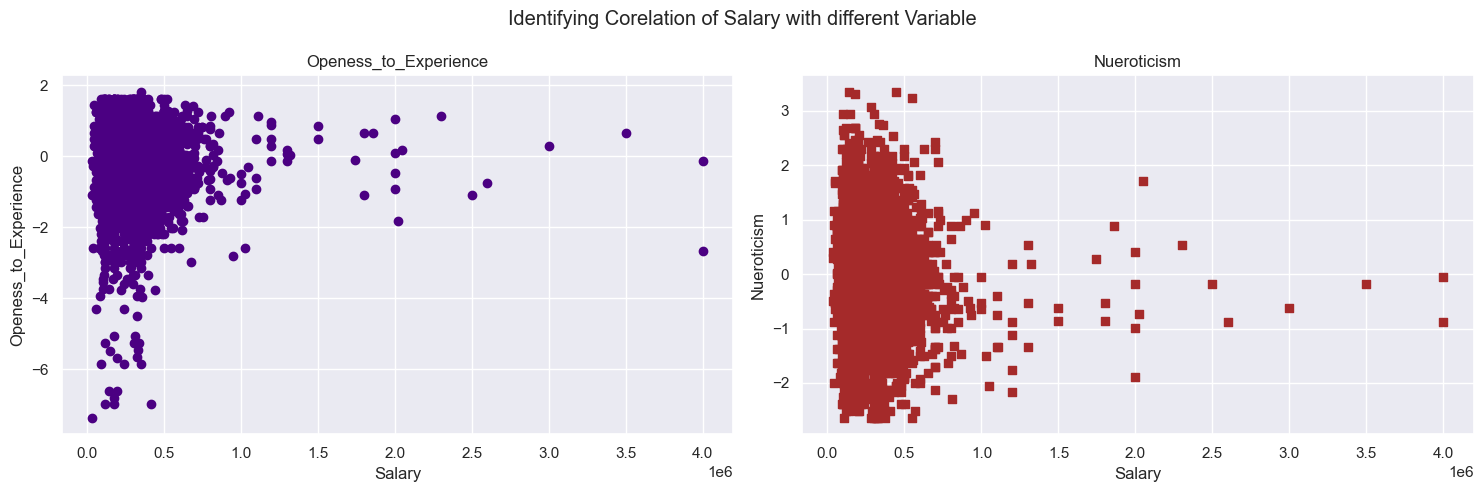

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Identifying Corelation of Salary with different Variable")

axs[0].scatter(dd['Salary'], dd['openess_to_experience'], color='indigo', marker='o')
axs[0].set_title('Openess_to_Experience')
axs[0].set_xlabel('Salary')
axs[0].set_ylabel('Openess_to_Experience')

axs[1].scatter(dd['Salary'], dd['nueroticism'], color='brown', marker='s')
axs[1].set_title('Nueroticism')
axs[1].set_xlabel('Salary')
axs[1].set_ylabel('Nueroticism')


plt.tight_layout()

plt.show()

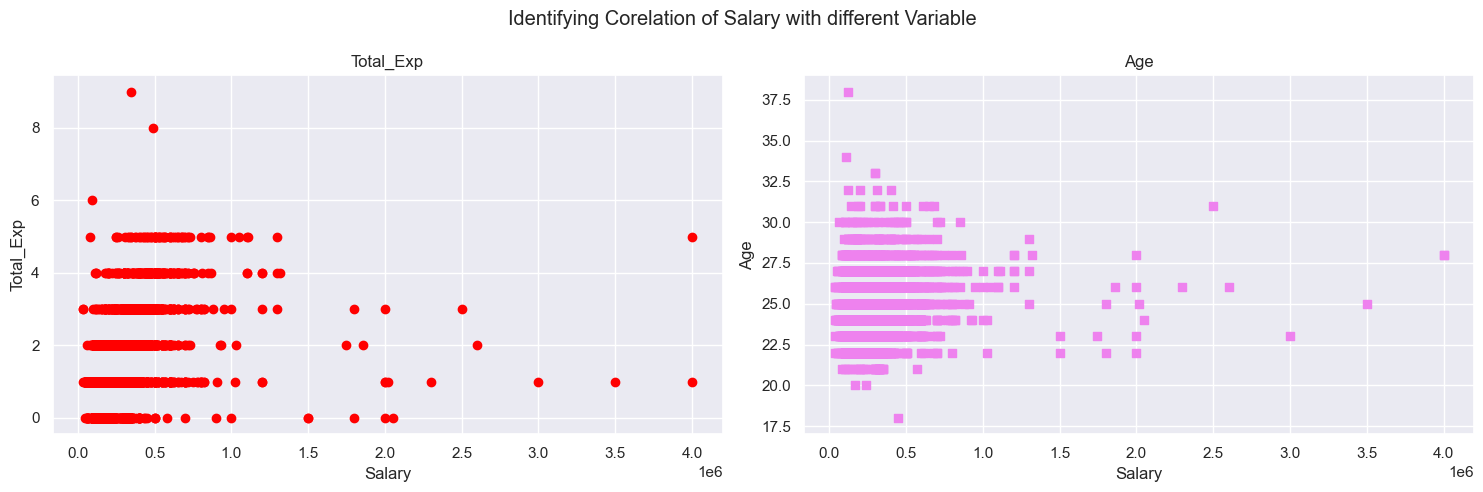

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Identifying Corelation of Salary with different Variable")

axs[0].scatter(dd['Salary'], dd['Total_Exp'], color='red', marker='o')
axs[0].set_title('Total_Exp')
axs[0].set_xlabel('Salary')
axs[0].set_ylabel('Total_Exp')

axs[1].scatter(dd['Salary'], dd['Age'], color='violet', marker='s')
axs[1].set_title('Age')
axs[1].set_xlabel('Salary')
axs[1].set_ylabel('Age')


plt.tight_layout()

plt.show()

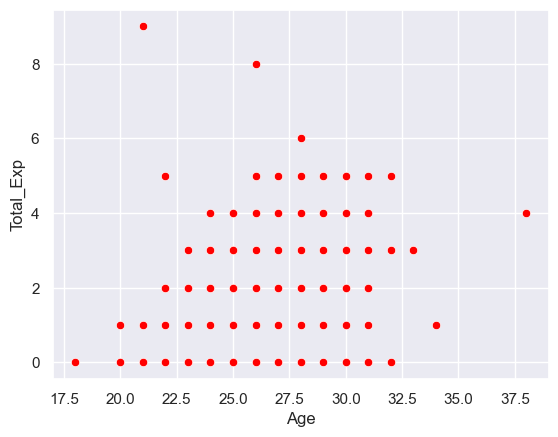

In [94]:
fig.suptitle("Identifying Corelation of Total Experience with Age")

sns.scatterplot(x= dd['Age'], y=dd['Total_Exp'], color='red', marker='o')

plt.show()


## Categorical v/s Numerical

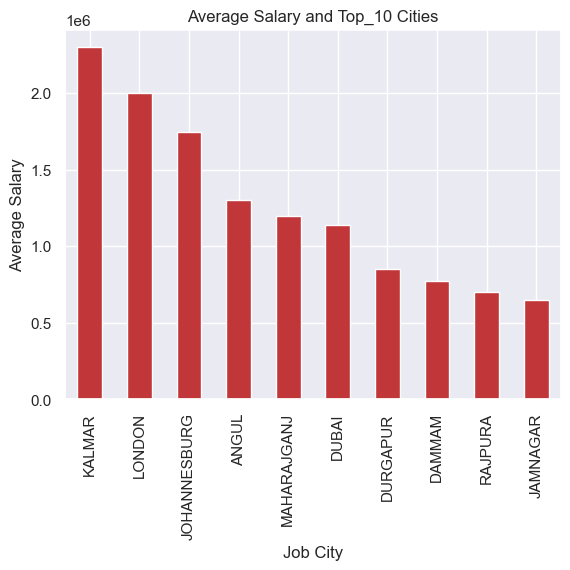

In [95]:
dd.groupby('JobCity')['Salary'].mean().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.ylabel("Average Salary")
plt.xlabel("Job City")
plt.title("Average Salary and Top_10 Cities")
plt.show()

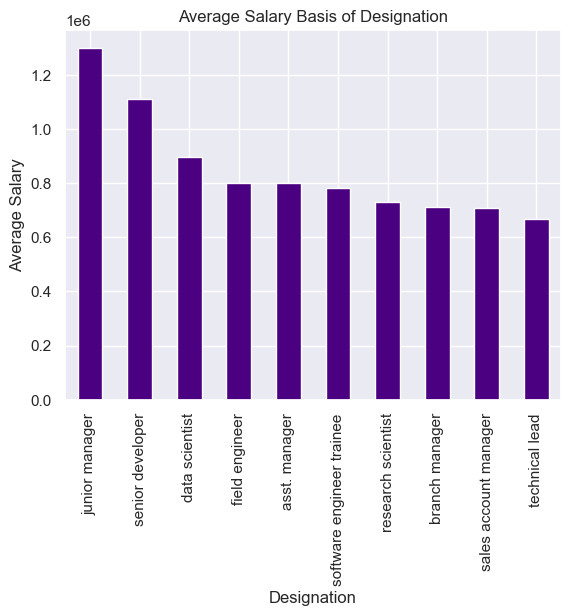

In [96]:
dd.groupby('Designation')['Salary'].mean().sort_values(ascending=False).head(10).plot(kind = 'bar', color = 'indigo')
plt.ylabel("Average Salary")
plt.xlabel("Designation")
plt.title("Average Salary Basis of Designation")
plt.show()

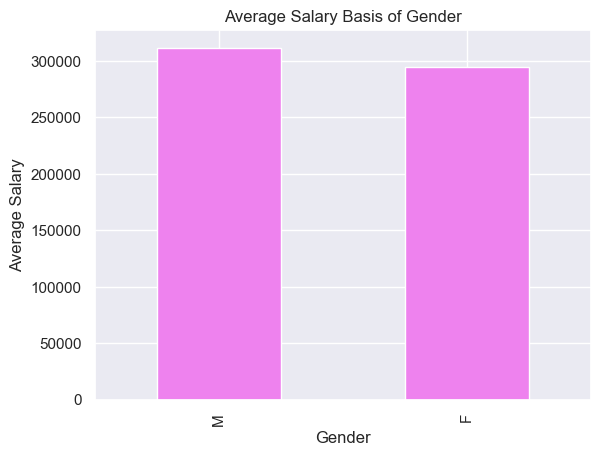

In [97]:
dd.groupby('Gender')['Salary'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'violet')
plt.ylabel("Average Salary")
plt.xlabel("Gender")
plt.title("Average Salary Basis of Gender")
plt.show()

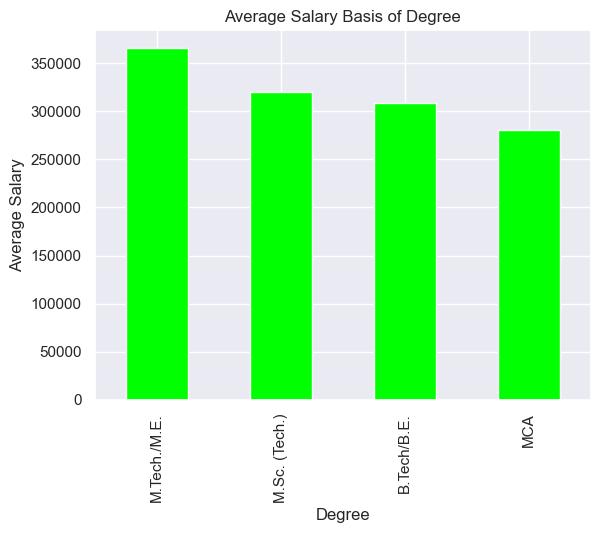

In [98]:
dd.groupby('Degree')['Salary'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'lime')
plt.ylabel("Average Salary")
plt.xlabel("Degree")
plt.title("Average Salary Basis of Degree")
plt.show()

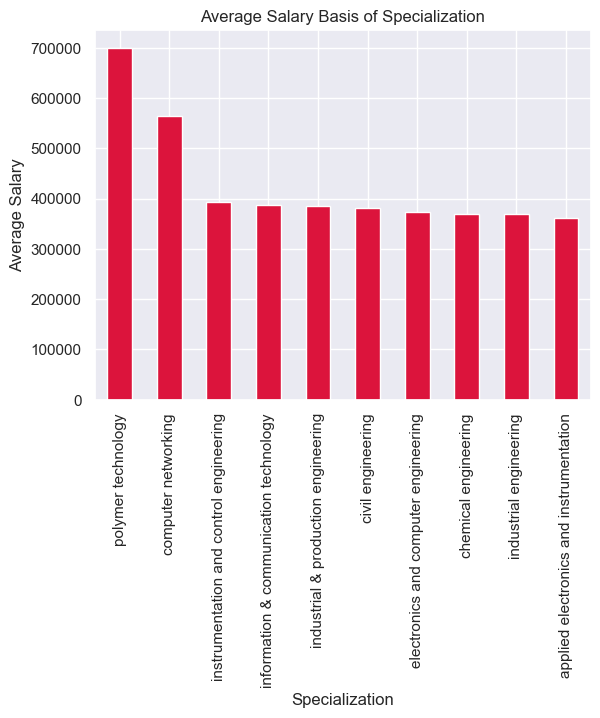

In [99]:
dd.groupby('Specialization')['Salary'].mean().sort_values(ascending=False).head(10).plot(kind = 'bar', color = 'crimson')
plt.ylabel("Average Salary")
plt.xlabel("Specialization")
plt.title("Average Salary Basis of Specialization")
plt.show()

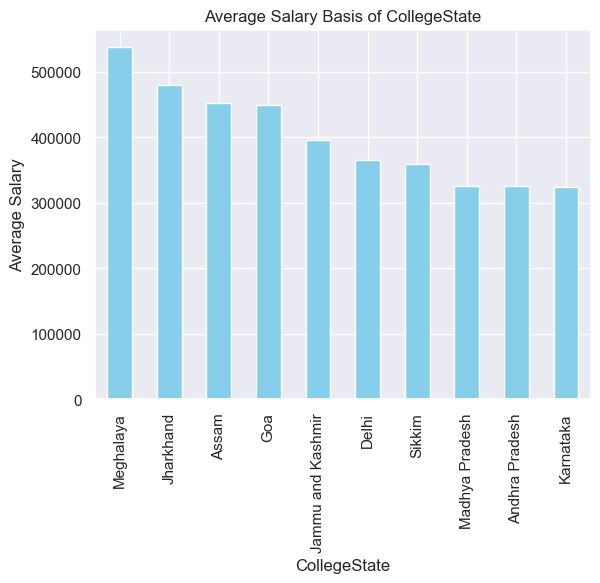

In [100]:
dd.groupby('CollegeState')['Salary'].mean().sort_values(ascending=False).head(10).plot(kind = 'bar', color = 'skyblue')
plt.ylabel("Average Salary")
plt.xlabel("CollegeState")
plt.title("Average Salary Basis of CollegeState")
plt.show()

In [101]:
object_col.columns

Index(['Designation', 'JobCity', 'Gender', 'Degree', 'Specialization',
       'CollegeState'],
      dtype='object')

In [102]:
pd.crosstab(dd['Specialization'].sort_values(ascending = False).head(10), dd['Gender'],values='count', aggfunc='count')

Gender,F,M
Specialization,,
other,NaN,2.0
polymer technology,NaN,1.0
power systems and automation,NaN,1.0
telecommunication engineering,1.0,5.0


## Research Questions

### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

H0: Reject claim of average salary of fresh graduate.

H1: Failed to Reject claim of average salary of fresh graduate.

In [103]:
course = dd[(dd['Specialization'] == 'computer science and engineering') & (dd['Salary'] > 0)]
designation = course[course['Designation'].isin(['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]
avg_sal = designation.groupby('Designation')['Salary'].mean()

In [104]:
avg_sal.index[0], avg_sal.index[1]

('associate engineer', 'software engineer')

In [105]:
if avg_sal[0] >= 250000 and avg_sal[0] <= 400000:
    print("Failed to Reject claim of average salary of fresh graduate.")
    
else:
    print("Reject claim of average salary of fresh graduate.")

Failed to Reject claim of average salary of fresh graduate.


In [106]:
if avg_sal[1] >= 250000 and avg_sal[1] <= 400000:
    print("Failed to Reject claim of average salary of fresh graduate.")
    
else:
    print("Reject claim of average salary of fresh graduate.")

Failed to Reject claim of average salary of fresh graduate.


## Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [107]:
rel = pd.crosstab(dd['Gender'], dd['Specialization'])

alpha = 0.05

chi2, p, dof, expected = chi2_contingency(rel)

print(f"Chi-squared statistic: {chi2}\n\n p-value: {p}\n\n Degrees of freedom: {dof}\n\n Expected frequencies table: {expected}\n\n")

if p < alpha:
    print("Gender and Specialization has a relationship.")
else:
    print("Gender and Specialization has no relationship.")

Chi-squared statistic: 97.1235246182905

 p-value: 1.1789013655961569e-06

 Degrees of freedom: 40

 Expected frequencies table: [[7.20241085e-01 9.84329483e+00 1.20040181e+00 4.80160723e-01
  3.60120542e+00 2.40080362e-01 2.16072325e+00 6.96233049e+00
  2.40080362e-01 5.85796082e+01 2.40080362e-01 1.79099950e+02
  1.44048217e+00 2.40080362e-01 4.80160723e-01 1.94465093e+01
  2.90497238e+01 2.11270718e+02 1.44528378e+02 4.63355098e+01
  6.48216976e+00 4.56152687e+00 2.40080362e-01 2.40080362e-01
  2.40080362e+00 4.80160723e-01 4.80160723e-01 6.72225013e+00
  1.58453039e+02 4.80160723e+00 9.60321447e-01 2.40080362e-01
  2.40080362e-01 9.60321447e-01 4.60954294e+01 9.60321447e-01
  4.80160723e-01 3.12104470e+00 2.40080362e-01 2.40080362e-01
  1.44048217e+00]
 [2.27975892e+00 3.11567052e+01 3.79959819e+00 1.51983928e+00
  1.13987946e+01 7.59919638e-01 6.83927675e+00 2.20376695e+01
  7.59919638e-01 1.85420392e+02 7.59919638e-01 5.66900050e+02
  4.55951783e+00 7.59919638e-01 1.51983928e+00 